Creates the database of the toolings by extracting the output file using RyR Generator target files and creates an Exploratory Data Analysis 

In [1]:
#% pip install openpyxl
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import sys
from __globals import *
from _utilities import plot_scatter
sys.path.append("../tools/")
import _db_tools as db #Personal tool for managing sqlite databases in data science

In [2]:
#Data preparation
dbh = db.SQLite_Data_Extractor("database.db") #Connect to the database
df = dbh.retrieve(glob.tooling) #Get the desired tooling data
dbh.close_conn() 
print("MEAS:")
df #Shows the df in html format

../database/database.db found.
Table TOP_PASSAT_B9 retrieved succesfully.
Closed connection to: ../database/database.db
MEAS:


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.3241,0.3242,0.3236,0.3234,0.3246,0.3246,0.3242,0.3243,0.3240,0.3245,...,0.3241,0.3238,0.3241,0.3243,0.3240,0.3238,0.3240,0.3235,0.3236,0.3238
1,0.3532,0.3532,0.3527,0.3526,0.3536,0.3536,0.3534,0.3535,0.3531,0.3533,...,0.3531,0.3527,0.3533,0.3532,0.3531,0.3530,0.3529,0.3526,0.3526,0.3529
2,0.3364,0.3362,0.3359,0.3358,0.3364,0.3364,0.3362,0.3363,0.3363,0.3362,...,0.3362,0.3358,0.3364,0.3361,0.3362,0.3363,0.3357,0.3358,0.3358,0.3362
3,0.3610,0.3610,0.3606,0.3606,0.3611,0.3611,0.3609,0.3611,0.3610,0.3609,...,0.3609,0.3605,0.3611,0.3608,0.3609,0.3610,0.3605,0.3605,0.3605,0.3609
4,0.3453,0.3458,0.3453,0.3454,0.3456,0.3457,0.3457,0.3457,0.3456,0.3454,...,0.3451,0.3451,0.3454,0.3453,0.3455,0.3453,0.3449,0.3455,0.3456,0.3451
5,0.3704,0.3707,0.3703,0.3704,0.3706,0.3706,0.3706,0.3707,0.3705,0.3704,...,0.3702,0.3701,0.3705,0.3703,0.3704,0.3704,0.3701,0.3703,0.3704,0.3702
6,0.3220,0.3219,0.3218,0.3216,0.3216,0.3216,0.3217,0.3214,0.3214,0.3213,...,0.3209,0.3210,0.3216,0.3214,0.3214,0.3212,0.3211,0.3210,0.3209,0.3209
7,0.3501,0.3500,0.3498,0.3498,0.3497,0.3497,0.3497,0.3496,0.3495,0.3494,...,0.3491,0.3491,0.3497,0.3494,0.3494,0.3493,0.3492,0.3491,0.3491,0.3490
8,0.3346,0.3347,0.3347,0.3346,0.3348,0.3345,0.3347,0.3342,0.3342,0.3343,...,0.3344,0.3341,0.3343,0.3347,0.3344,0.3340,0.3342,0.3343,0.3341,0.3343
9,0.3605,0.3605,0.3605,0.3604,0.3606,0.3603,0.3605,0.3601,0.3601,0.3601,...,0.3601,0.3599,0.3602,0.3604,0.3602,0.3599,0.3600,0.3601,0.3599,0.3600


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


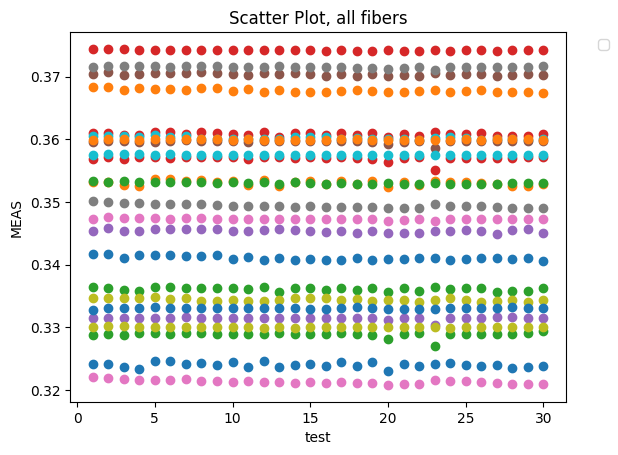

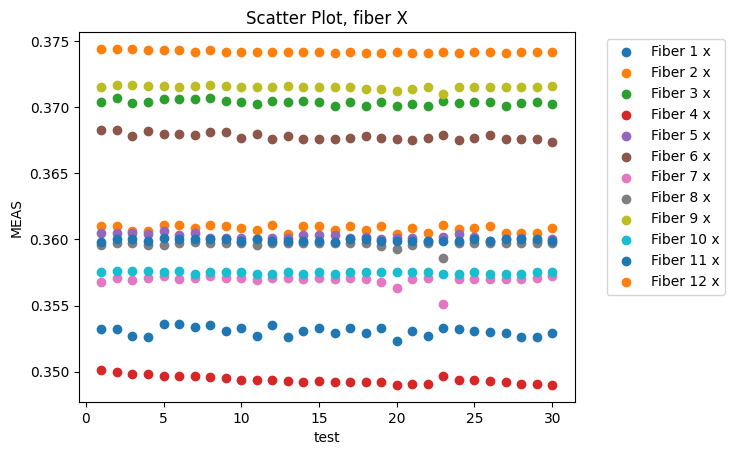

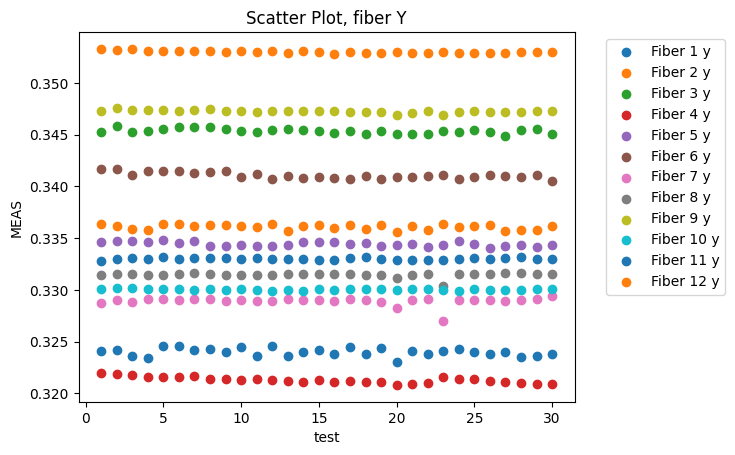

In [3]:
#Plots
plot_scatter(df, 'Scatter Plot, all fibers', 'test', 'MEAS', 'Guide: ') #Plot all guides
plot_scatter(df, 'Scatter Plot, fiber X', 'test', 'MEAS', 'Fiber', filter='x') #Plot x axis values
plot_scatter(df, 'Scatter Plot, fiber Y', 'test', 'MEAS', 'Fiber', filter='y') #Plot y axis values

In [4]:
resume = df.transpose().describe() #Transpose the df first due to describe() working in columns.
df.transpose().describe() #This second call allows for a nicer output in jupiter.

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000
mean,0.324000,0.35305,0.336113,0.360830,0.345393,0.370373,0.321310,0.349403,0.334400,0.360193,...,0.331427,0.359630,0.347270,0.371503,0.330053,0.357480,0.33302,0.359943,0.353017,0.374210
std,0.000395,0.00034,0.000247,0.000234,0.000221,0.000178,0.000311,0.000295,0.000218,0.000200,...,0.000215,0.000214,0.000142,0.000138,0.000078,0.000066,0.00010,0.000068,0.000121,0.000088
min,0.323000,0.35230,0.335600,0.360400,0.344900,0.370100,0.320800,0.349000,0.334000,0.359900,...,0.330400,0.358600,0.346900,0.371000,0.329900,0.357400,0.33280,0.359800,0.352800,0.374100
25%,0.323800,0.35275,0.335900,0.360625,0.345300,0.370225,0.321100,0.349200,0.334200,0.360100,...,0.331400,0.359625,0.347200,0.371500,0.330000,0.357400,0.33300,0.359900,0.352900,0.374200
50%,0.324000,0.35310,0.336200,0.360900,0.345400,0.370400,0.321300,0.349350,0.334350,0.360100,...,0.331500,0.359700,0.347300,0.371500,0.330100,0.357500,0.33300,0.359900,0.353000,0.374200
75%,0.324275,0.35330,0.336300,0.361000,0.345575,0.370500,0.321550,0.349675,0.334600,0.360300,...,0.331500,0.359700,0.347300,0.371600,0.330100,0.357500,0.33310,0.360000,0.353100,0.374200
max,0.324600,0.35360,0.336400,0.361100,0.345800,0.370700,0.322000,0.350100,0.334800,0.360600,...,0.331600,0.359800,0.347600,0.371700,0.330200,0.357600,0.33320,0.360100,0.353300,0.374400


Analysis of faulty fibers

In [5]:
largest = resume.loc['std'].sort_values(ascending=False)[:5]  #Filter the 5 largest values
index = largest.index.tolist()  #Get the index in a list format
for i in range(largest.shape[0]): #Differentiate between x-fibers (odds) and y-fibers
    if index[i] % 2 == 0:
        index[i] = f"fiber x {index[i]+1}:"
    else:
        index[i] = f"fiber y {index[i]+1}:"
largest.index = index
print("Fibers with largest deviation:")
print(largest)

Fibers with largest deviation:
fiber x 13:    0.000408
fiber x 1:     0.000395
fiber y 14:    0.000388
fiber y 2:     0.000340
fiber x 11:    0.000318
Name: std, dtype: float64


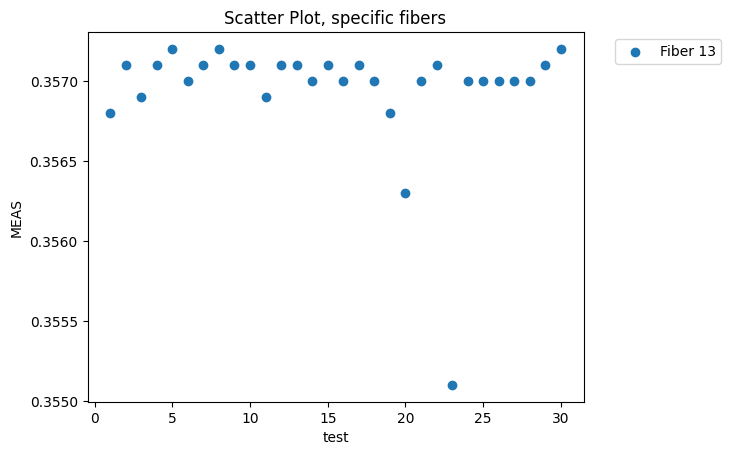

In [6]:
plot_scatter(df, 'Scatter Plot, specific fibers', 'test', 'MEAS', 'Fiber', filter=13)